Mohammed Abdul Khaliq

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load in the data
pd.set_option('display.max_columns', None)

missing_values = ["n/a", "na", "--", "-", "NA", "NaN"]
housing = pd.read_csv("housing.csv", low_memory=False, na_values = missing_values)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
# number of instances in the original dataset
housing.shape

(20640, 10)

In [5]:
# data types
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.dropna(inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
housing.describe(include=["O"])

,ocean_proximity
count,20433
unique,5
top,<1H OCEAN
freq,9034


Text(0, 0.5, 'Frequency')

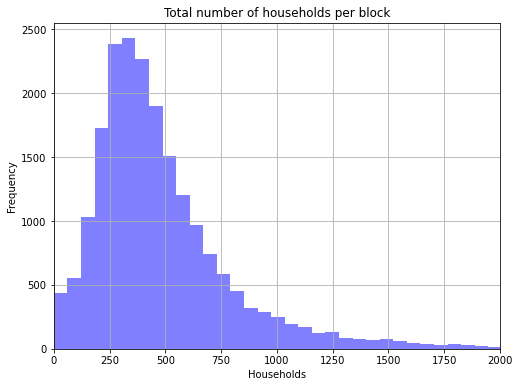

In [11]:
housing["households"].plot(kind="hist", figsize=(8,6),\
                           bins=100, xlim=(0, 2000), \
                           alpha=0.5, color="b", grid=True)

plt.title("Total number of households per block")
plt.xlabel("Households")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

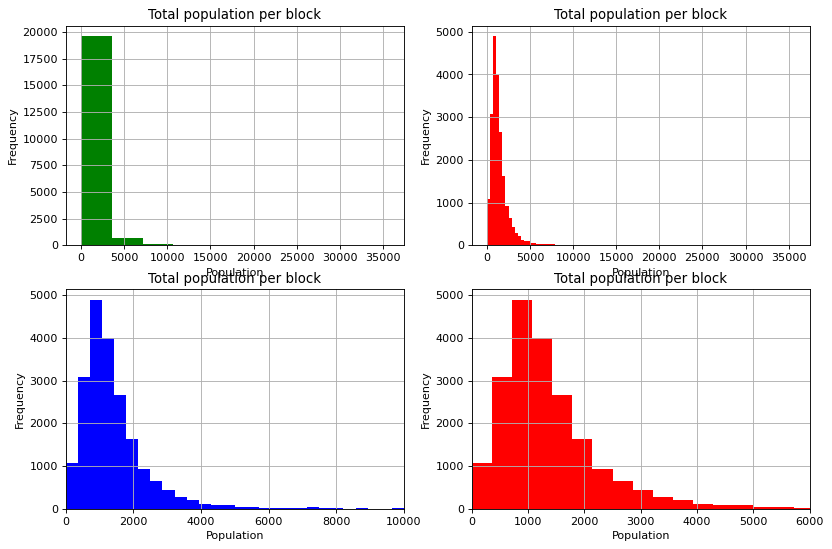

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)

plt.subplot(221)
housing["population"].plot(kind="hist", facecolor="g", grid=True)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(222)
housing["population"].plot(kind="hist", bins=100, facecolor="r", grid=True)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(223)
housing["population"].plot(kind="hist", bins=100, facecolor="b", grid=True)
plt.xlim(0, 10000)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

plt.subplot(224)
housing["population"].plot(kind="hist", bins=100, facecolor="r", grid=True)
plt.xlim(0, 6000)
plt.title("Total population per block")
plt.xlabel("Population")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

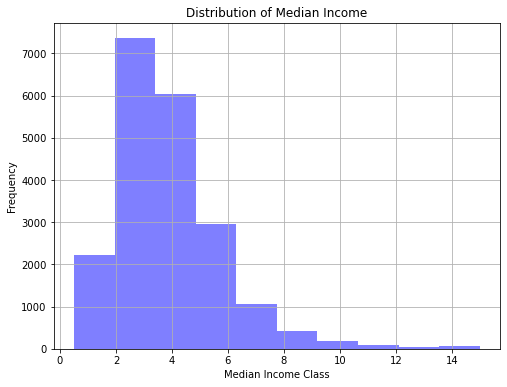

In [13]:
housing["median_income"].plot(kind="hist", figsize=(8,6),\
                        alpha=0.5, color="b", grid=True)

plt.title("Distribution of Median Income")
plt.xlabel("Median Income Class")
plt.ylabel("Frequency")

In [14]:
proximity = housing.groupby(["ocean_proximity"]).size().reset_index(name="total")
proximity

,ocean_proximity,total
0,<1H OCEAN,9034
1,INLAND,6496
2,ISLAND,5
3,NEAR BAY,2270
4,NEAR OCEAN,2628


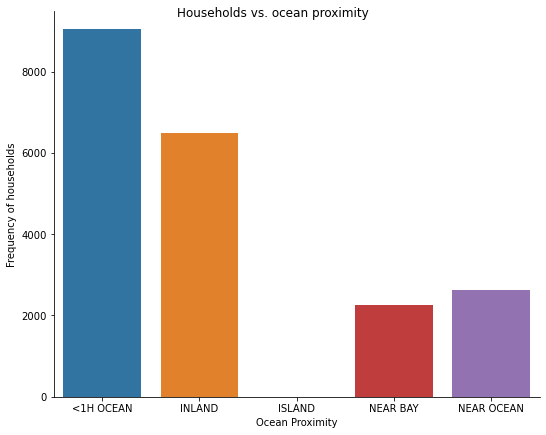

In [15]:
g = sns.catplot(x = "ocean_proximity", \
                y = "total", \
                kind="bar", \
                data = proximity)
g.fig.set_size_inches(8, 6)
g.fig.suptitle("Households vs. ocean proximity")
g.set(xlabel="Ocean Proximity", ylabel="Frequency of households")